# ***ENSURING SAFETY WITH MOTORCYCLE HELMET DETECTION***


---



## **Template Matching**



# *Full Image*

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
full = cv2.imread('/content/BikesHelmets121.png')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

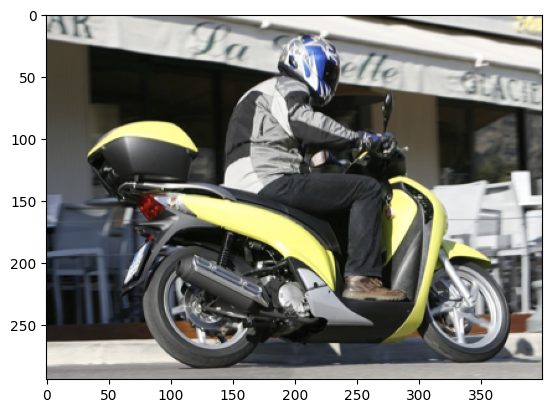

In [ ]:
plt.imshow(full)

#*Template Image*

In [ ]:
face= cv2.imread('/content/BikesHelmets121_crop.png')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

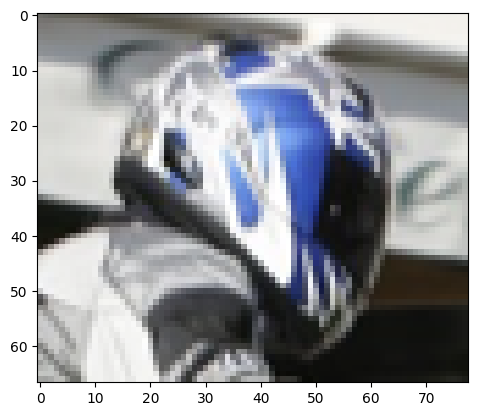

In [ ]:
plt.imshow(face)

# *Template Matching Methods*



In [ ]:
sum([1,2,3])

6

In [ ]:
mystring = 'sum'

In [ ]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [ ]:
myfunc = eval(mystring)

In [ ]:
myfunc([1,2,3])

6

In [ ]:
height, width,channels = face.shape

In [ ]:
width

78

In [ ]:
height

67

In [ ]:
# The Full Image to Search
full = cv2.imread('/content/BikesHelmets121.png')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('/content/BikesHelmets121_crop.png')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

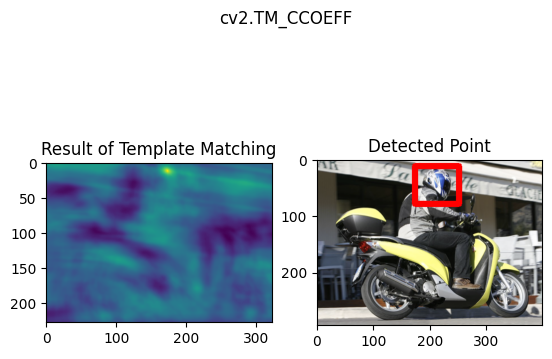

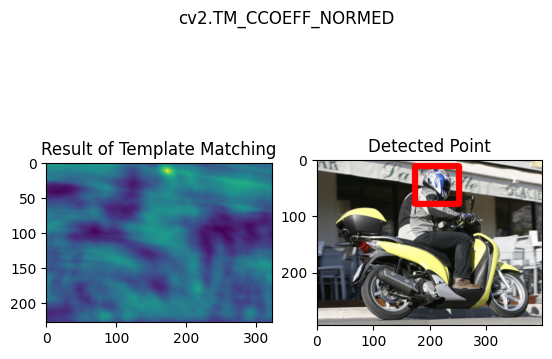

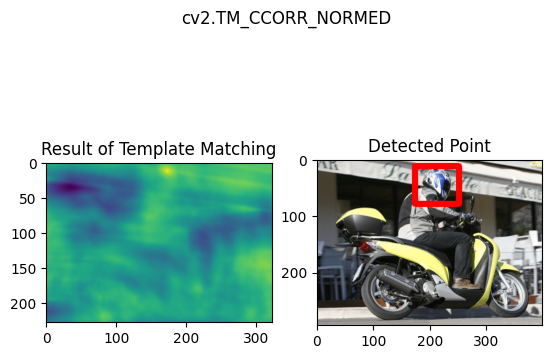

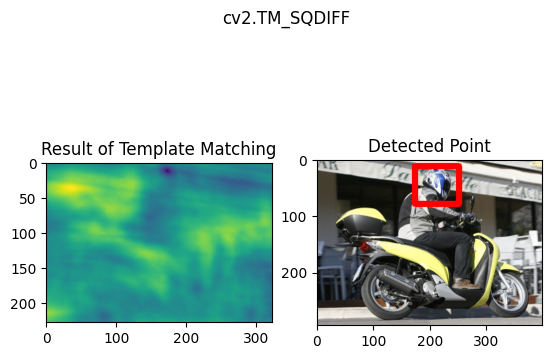

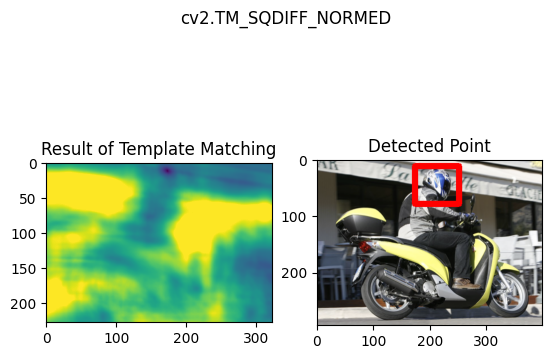

In [ ]:
for m in methods:

    # Create a copy of the image
    full_copy = full.copy()

    # Get the actual function instead of the string
    method = eval(m)

    # Applying template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)

    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Set up drawing of Rectangle
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)


    plt.show()
    print('\n')
    print('\n')


# **Feature Matching**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
helmet = cv2.imread('/content/BikesHelmets158_crop.png',0)

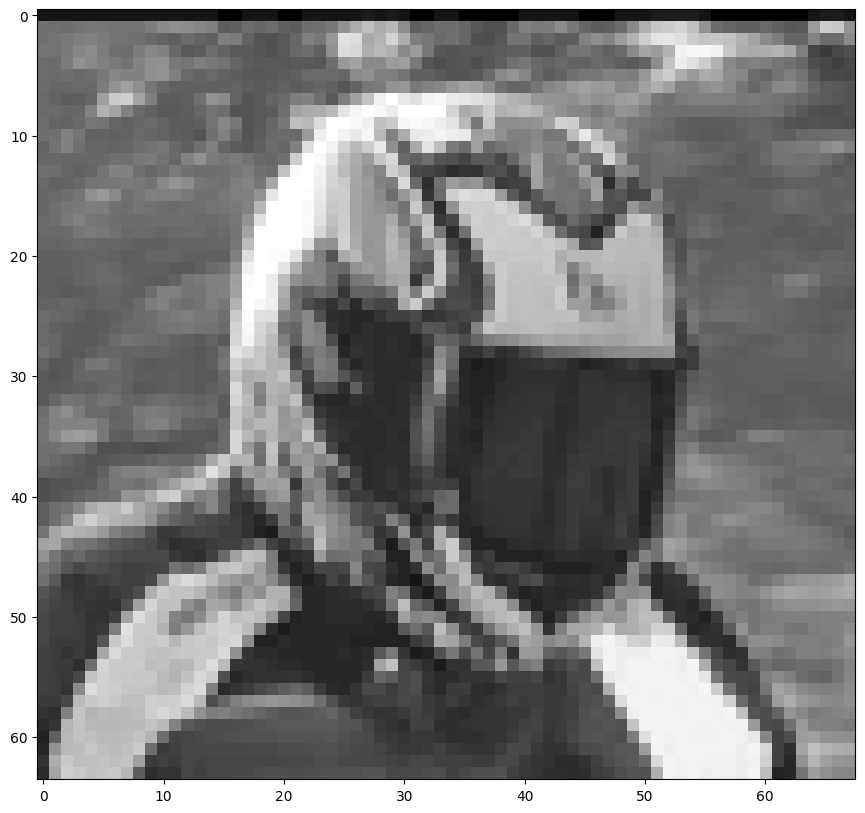

In [ ]:
display(helmet)

In [ ]:
input = cv2.imread('/content/BikesHelmets158.png',0)

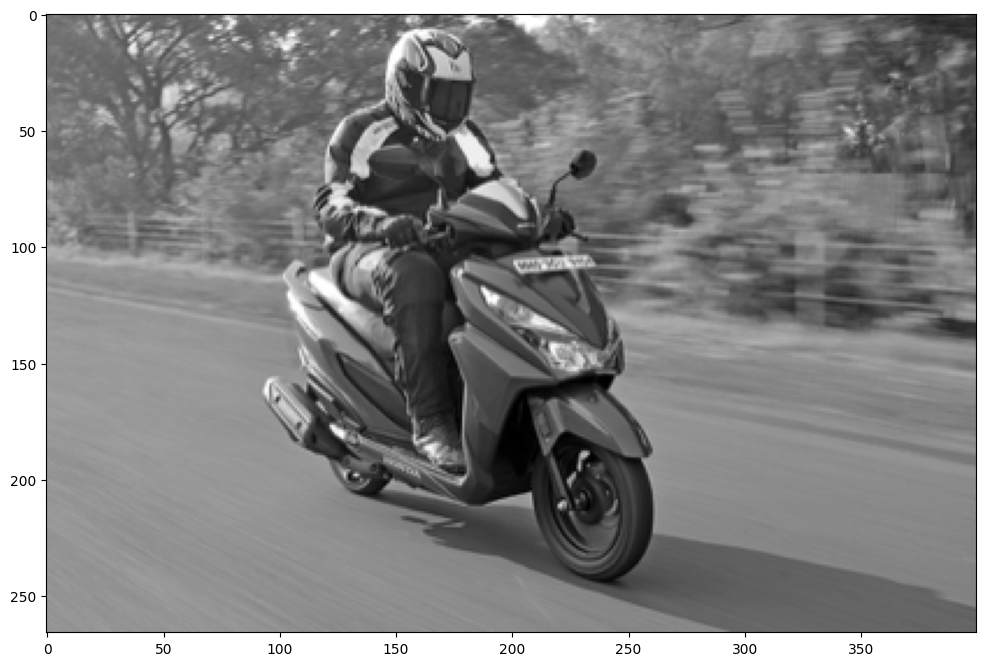

In [ ]:
display(input)

# Brute Force Detection with ORB Descriptors

-------------------

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(helmet,None)
kp2, des2 = orb.detectAndCompute(input,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
helmet_matches = cv2.drawMatches(helmet,kp1,input,kp2,matches[:25],None,flags=2)

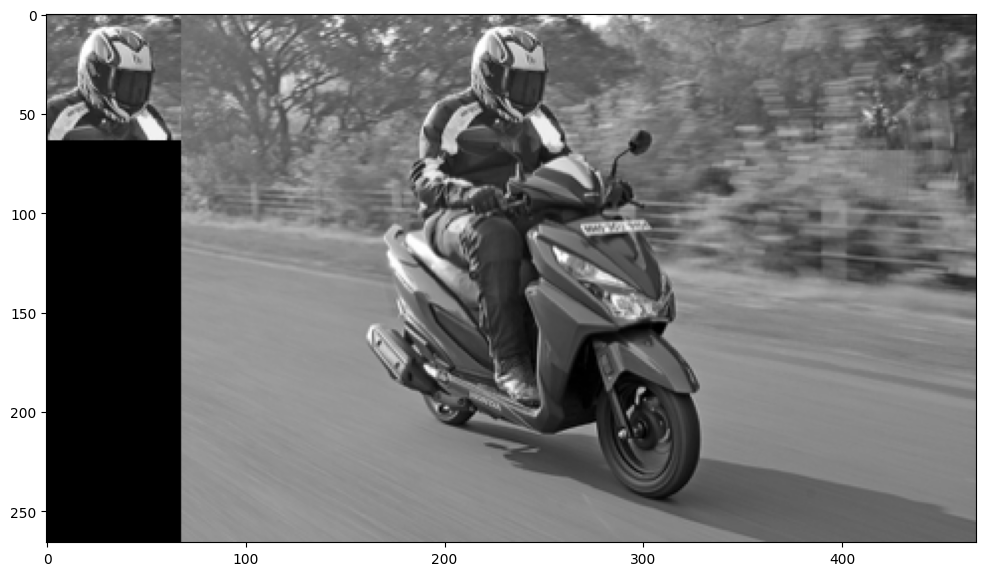

In [ ]:
display(helmet_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

---



In [ ]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(helmet,None)
kp2, des2 = sift.detectAndCompute(input,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(helmet,kp1,input,kp2,good,None,flags=2)

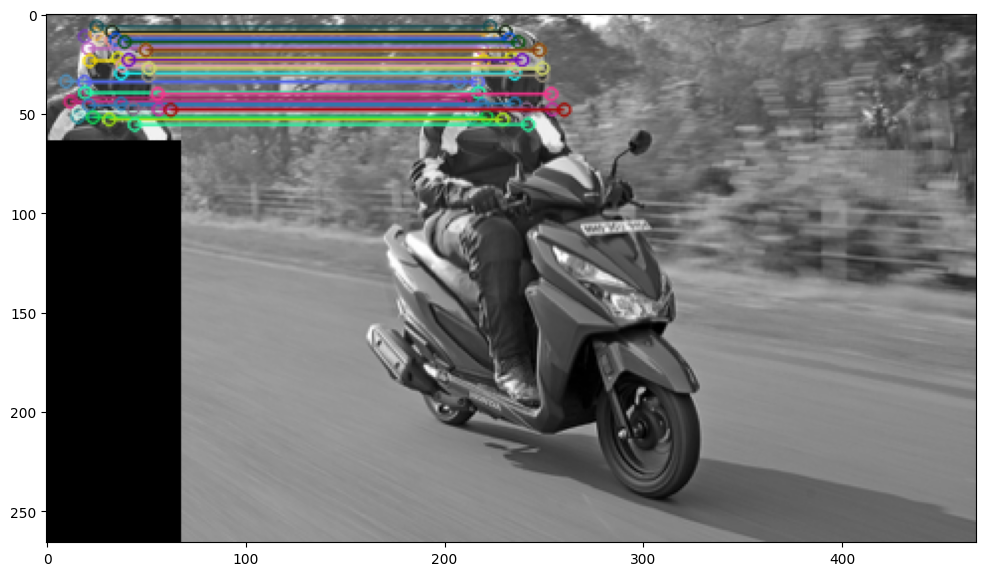

In [ ]:
display(sift_matches)

# FLANN Based Matcher

---



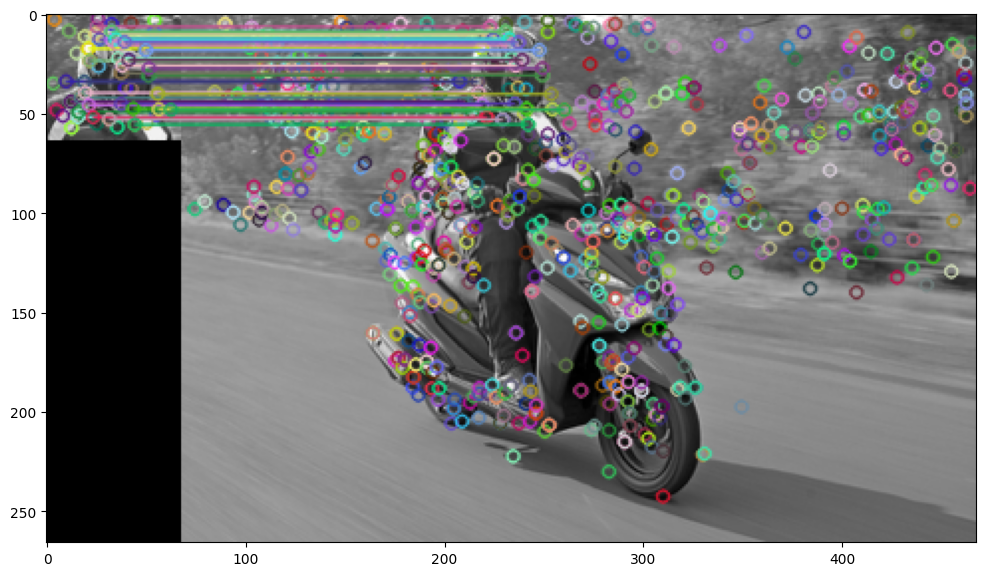

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(helmet,None)
kp2, des2 = sift.detectAndCompute(input,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:

        good.append([match1])


flann_matches = cv2.drawMatchesKnn(helmet,kp1,input,kp2,good,None,flags=0)

display(flann_matches)

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(helmet,None)
kp2, des2 = sift.detectAndCompute(input,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(helmet,kp1,input,kp2,matches,None,**draw_params)

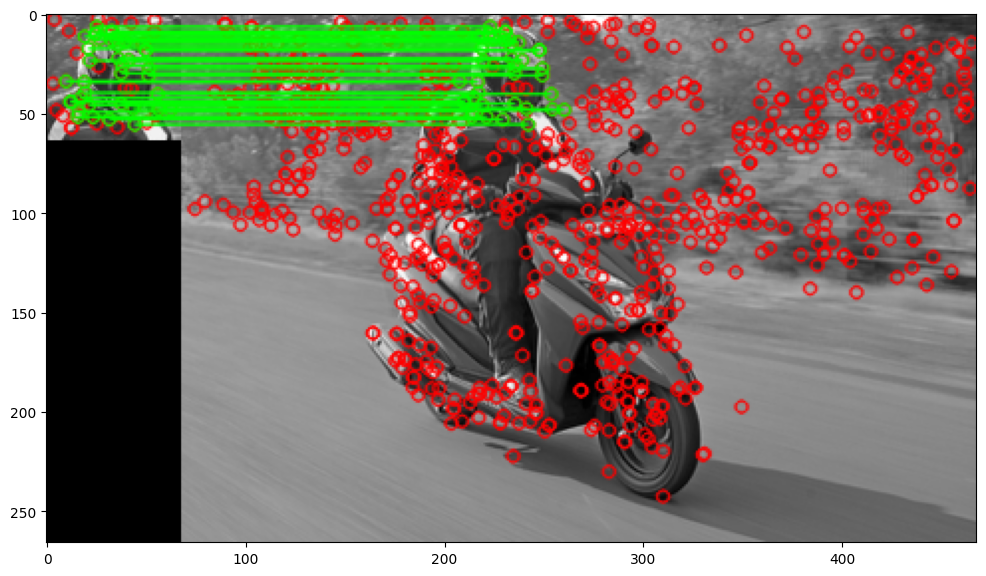

In [ ]:
display(flann_matches)

# **Helmet Detection using CNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
path='/content/drive/MyDrive/fip project updated.zip'
with ZipFile(path,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# https://keras.io/api/preprocessing/image/#imagedatagenerator-class
## data augmentation - generating more samples of images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 200 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [ ]:
### Creating model and layers
model = Sequential();   ## blank model
# Step 1 - Convolution
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))   ## applied for under/over fitting
# Step 1 - Convolution
model.add(Conv2D(64,(3,3),activation='relu'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# Step 3 - Flattening
model.add(Flatten())
### output
# Step 4 - Full connection
model.add(Dense(1, activation='sigmoid'))   ## output layer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
# Compiling the CNN
model.compile(optimizer =optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,
          epochs = 100,
          steps_per_epoch=200//32,
          validation_steps=68//32,
          validation_data = test_set)

Epoch 1/100
6/6 [==============================] - 7s 764ms/step - loss: 0.6909 - accuracy: 0.5238 - val_loss: 0.6930 - val_accuracy: 0.5312
Epoch 2/100
6/6 [==============================] - 6s 1s/step - loss: 0.7121 - accuracy: 0.4464 - val_loss: 0.6988 - val_accuracy: 0.4844
Epoch 3/100
6/6 [==============================] - 4s 706ms/step - loss: 0.6882 - accuracy: 0.5417 - val_loss: 0.6931 - val_accuracy: 0.5156
Epoch 4/100
6/6 [==============================] - 5s 939ms/step - loss: 0.6987 - accuracy: 0.4762 - val_loss: 0.6926 - val_accuracy: 0.4375
Epoch 5/100
6/6 [==============================] - 4s 724ms/step - loss: 0.6988 - accuracy: 0.5476 - val_loss: 0.6933 - val_accuracy: 0.5156
Epoch 6/100
6/6 [==============================] - 4s 702ms/step - loss: 0.7040 - accuracy: 0.4405 - val_loss: 0.6934 - val_accuracy: 0.5156
Epoch 7/100
6/6 [==============================] - 5s 913ms/step - loss: 0.6919 - accuracy: 0.5298 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 8/100
6/6 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


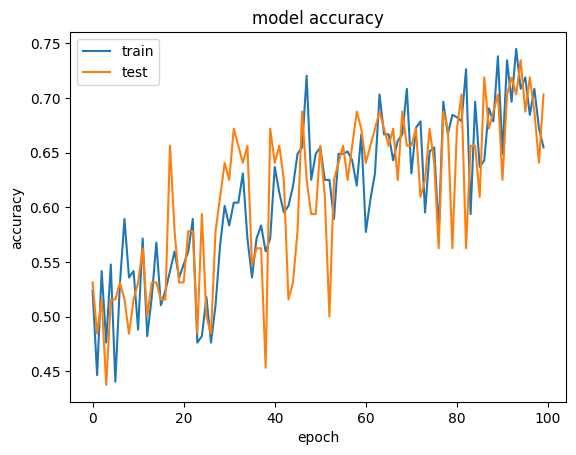

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the model to an HDF5 file
model.save("helmet_detection_model.h5")
print("Model savedásuccessfully.")

Model savedásuccessfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 237ms/step
Helmet Found


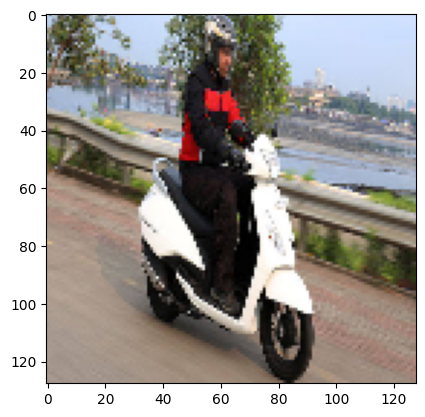

In [ ]:
img = cv2.imread("/content/BikesHelmets120.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(128,128))
img = img/255
output=model.predict(np.array([img])).round()
if output==1:
  print('Helmet Not Found')
if output==0:
  print('Helmet Found')
plt.imshow(img);

1/1 [==============================] - 0s 19ms/step
Helmet Found


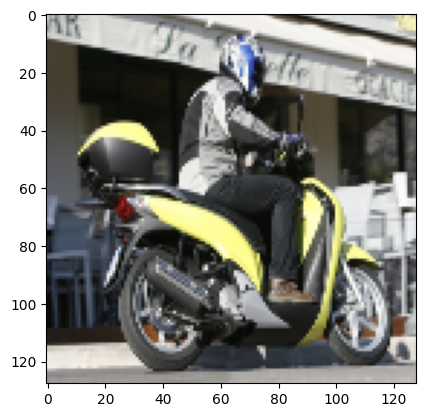

In [ ]:
img = cv2.imread("/content/BikesHelmets121.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(128,128))
img = img/255
output=model.predict(np.array([img])).round()
if output==1:
  print('Helmet Not Found')
if output==0:
  print('Helmet Found')
plt.imshow(img);